<a href="https://colab.research.google.com/github/2303A52487/Explainable-AI/blob/main/EXP_AI_Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dice-ml --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import dice_ml

In [ ]:
df = pd.read_csv("/content/lung_cancer_dataset.csv")
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (50000, 11)
   patient_id  age  gender  pack_years radon_exposure asbestos_exposure  \
0      100000   69    Male   66.025244           High                No   
1      100001   32  Female   12.780800           High                No   
2      100002   89  Female    0.408278         Medium               Yes   
3      100003   78  Female   44.065232            Low                No   
4      100004   38  Female   44.432440         Medium               Yes   

  secondhand_smoke_exposure copd_diagnosis alcohol_consumption family_history  \
0                        No            Yes            Moderate             No   
1                       Yes            Yes            Moderate            Yes   
2                       Yes            Yes                 NaN             No   
3                       Yes             No            Moderate             No   
4                        No            Yes                 NaN            Yes   

  lung_cancer  
0          No  
1  

In [ ]:
target_col = "lung_cancer"
y = df[target_col]
X = df.drop(columns=[target_col, "patient_id"])

In [ ]:
label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y)
print("\nLabel Mapping:", dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_))))



Label Mapping: {'No': np.int64(0), 'Yes': np.int64(1)}


In [ ]:
# Define features (X) and target (y)
target_col = "lung_cancer"
y = df[target_col]
X = df.drop(columns=[target_col, "patient_id"])

# Handle missing values in 'alcohol_consumption' by filling with the mode
if 'alcohol_consumption' in X.columns:
    X['alcohol_consumption'] = X['alcohol_consumption'].fillna(X['alcohol_consumption'].mode()[0])
else:
    print("'alcohol_consumption' column not found in X. Skipping missing value imputation for this column.")

# Perform one-hot encoding on categorical columns
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_enc, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, multi_class="multinomial"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average="macro"),
        "Recall": recall_score(y_test, preds, average="macro"),
        "F1 Score": f1_score(y_test, preds, average="macro")
    })

    print(f"\n=== Classification Report: {name} ===")
    print(classification_report(y_test, preds, target_names=label_enc.classes_))

results_df = pd.DataFrame(results)
print("\n=== Model Performance Summary ===")
print(results_df)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



=== Classification Report: Logistic Regression ===
              precision    recall  f1-score   support

          No       0.58      0.34      0.43      3118
         Yes       0.75      0.89      0.81      6882

    accuracy                           0.72     10000
   macro avg       0.66      0.61      0.62     10000
weighted avg       0.70      0.72      0.69     10000


=== Classification Report: Random Forest ===
              precision    recall  f1-score   support

          No       0.52      0.44      0.48      3118
         Yes       0.76      0.82      0.79      6882

    accuracy                           0.70     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.69      0.70      0.69     10000


=== Model Performance Summary ===
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression    0.7173   0.663979  0.613233  0.619334
1        Random Forest    0.6993   0.641763  0.627520  0.632287


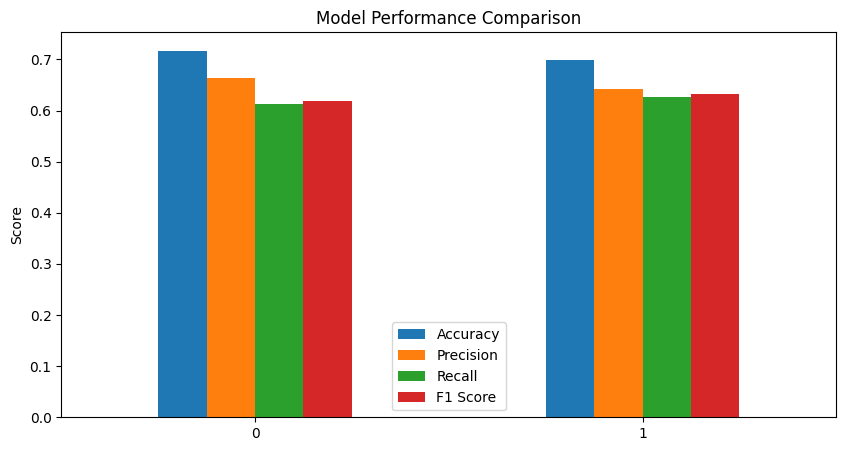

In [ ]:
results_df.plot(kind='bar', figsize=(10,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


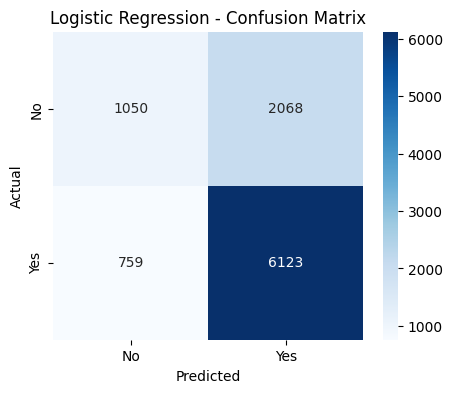

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


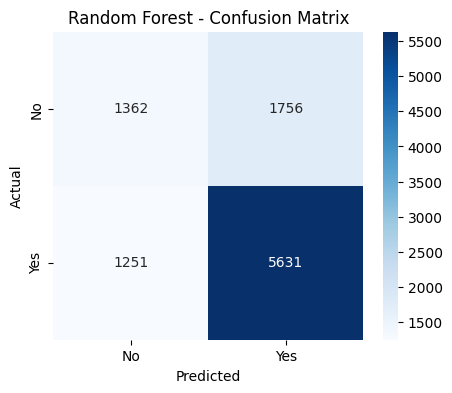

In [ ]:
for name, model in models.items():
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=label_enc.classes_,
                yticklabels=label_enc.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

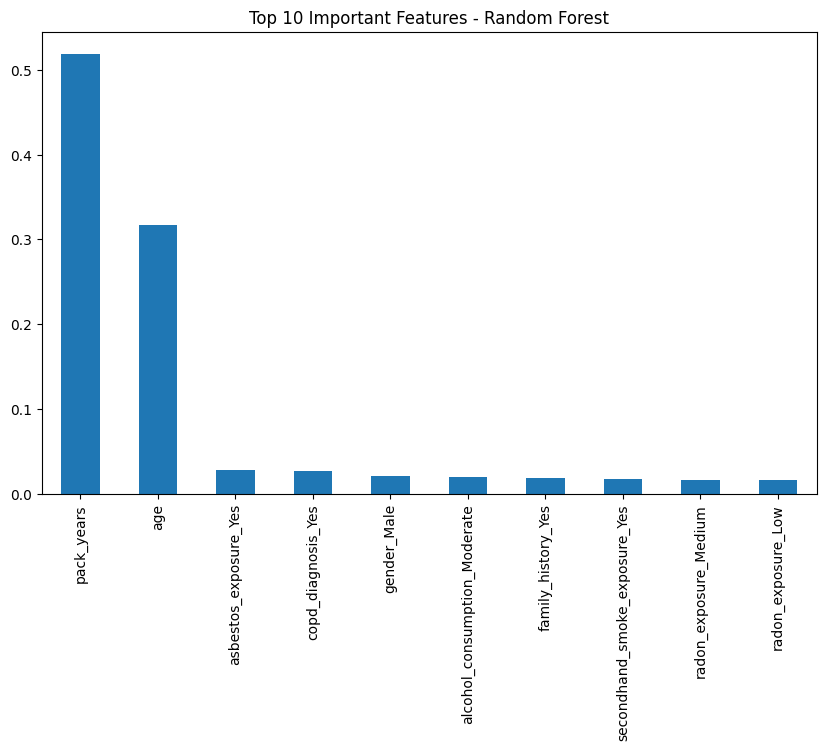

In [ ]:
plt.figure(figsize=(10,6))
importances = models["Random Forest"].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp[:10].plot(kind='bar')
plt.title("Top 10 Important Features - Random Forest")
plt.show()

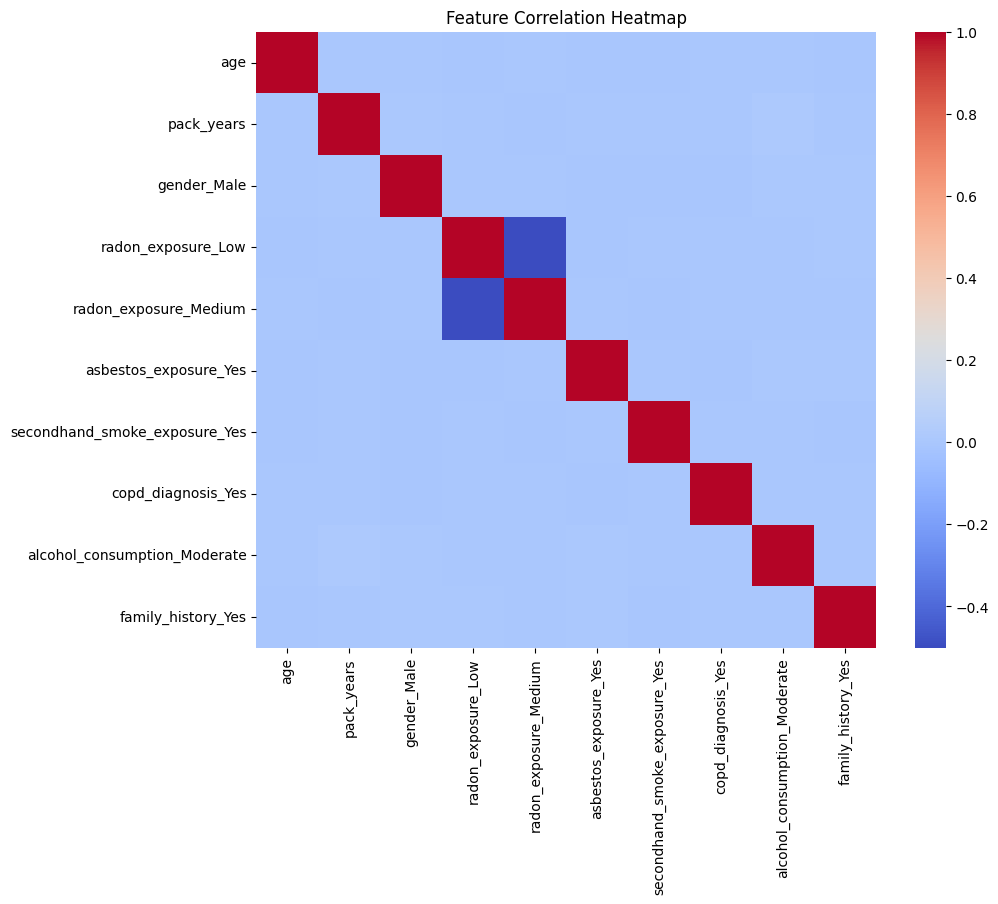

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
print(label_enc.classes_)


['No' 'Yes']
